In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re


In [2]:
df=pd.read_csv("~/Downloads/summary.csv",sep=",")


In [3]:
sns.set(style="whitegrid")

In [4]:
df["name"]
df.keys()

Index(['name', 'JHparams', 'lenA', 'lenB', 'msa', 'msaA', 'msaB', 'dockQ',
       'fnat', 'iRMS', 'LRMS', 'fnonnat', 'mm', 'tmA', 'tmB', 'long', 'med',
       'longPPV', 'medPPV', 'longA', 'medA', 'longPPVA', 'medPPVA', 'longB',
       'medB', 'longPPVB', 'medPPVB', 'auc', 'evalue', 'seqid', 'rank'],
      dtype='object')

In [5]:

df["code"]=df["name"].str[:4]
df["CODE"]=df["code"]
df["params"]=df["JHparams"]

In [6]:
r=re.compile("^PDB|^pdb|^TMd|gramm")
datasets=df.JHparams.unique()
notRosettaset=list(filter(r.match, datasets))
df2=df.loc[~df.JHparams.isin(notRosettaset)].copy()
df2.JHparams="trRosetta"
df2

,name,JHparams,lenA,lenB,msa,msaA,msaB,dockQ,fnat,iRMS,...,medB,longPPVB,medPPVB,auc,evalue,seqid,rank,code,CODE,params
0,1ay7_u1_A-1ay7_u2_A,trRosetta,97,90,1060.0,1485,2034,0.298,0.222,3.561,...,116,0.985,0.966,0.40,9999.0,0.000,1,1ay7,1ay7,-N 3 --cpu 8
1,1ay7_u2_A-1ay7_u1_A,trRosetta,90,97,1060.0,2034,1485,0.254,0.278,4.395,...,150,0.960,0.987,0.36,9999.0,0.000,2,1ay7,1ay7,-N 3 --cpu 8
2,1b27_u1_A-1b27_u2_A,trRosetta,109,90,733.0,1484,2034,0.223,0.120,4.508,...,113,0.992,0.965,0.46,4.3,50.000,1,1b27,1b27,-N 3 --cpu 8
3,1b27_u2_A-1b27_u1_A,trRosetta,90,109,733.0,2034,1484,0.231,0.160,4.840,...,154,0.971,0.981,0.46,4.3,50.000,2,1b27,1b27,-N 3 --cpu 8
4,1bdj_u1_A-1bdj_u2_A,trRosetta,129,118,5651.0,349880,23051,0.000,0.000,211.527,...,92,0.996,1.000,0.00,9999.0,0.000,1,1bdj,1bdj,-N 3 --cpu 8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6568,4y5o_u1_A-4y5o_u2_A,trRosetta,94,85,34.0,0.,0.,0.055,0.000,11.394,...,41,0.972,0.951,0.00,9999.0,0.000,1,4y5o,4y5o,rbh
6569,4zfr_u1_A-4zfr_u2_A,trRosetta,186,77,12.0,0.,0.,0.048,0.000,14.464,...,37,0.846,0.946,0.09,9999.0,0.000,1,4zfr,4zfr,rbh
6570,5brr_u1_A-5brr_u2_A,trRosetta,378,266,107.0,0.,0.,0.009,0.000,18.458,...,306,0.995,1.000,0.00,236.0,66.667,1,5brr,5brr,rbh
6571,5cec_u1_A-5cec_u2_A,trRosetta,403,191,7.0,0.,0.,0.011,0.000,20.074,...,109,0.737,0.367,0.00,197.0,33.333,1,5cec,5cec,rbh


In [7]:
df=pd.concat([df,df2], ignore_index=True,sort=False)
df.fillna(0)
df.JHparams.unique()

array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       '-N 5 --cpu 8', 'pdbcontacts-allintra', 'pdbcontacts', 'PDBDOCK2',
       'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK', 'pdbnewcontacts',
       'PDBNEWDOCK-A', 'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2',
       'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1',
       'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax',
       'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2',
       'PDBNEWDOCK-A--dockD-relax', 'PDBNEWDOCK-A--starting',
       'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B--dockB1',
       'PDBNEWDOCK-B--dockB2', 'PDBNEWDOCK-B--dockB-relax',
       'PDBNEWDOCK-B--starting', 'PDBNEWDOCK-B--step1', 'PDBNEWDOCK-B',
       'PDBNEWDOCK-B--dockC1', 'PDBNEWDOCK-B--dockC2',
       'PDBNEWDOCK-B--dockC-relax', 'PDBNEW

In [8]:
# Divide data into datasets


df["tmAB"]=df[["tmA","tmB"]].mean(axis=1)
df["msaAB"]=df[["msaA","msaB"]].mean(axis=1)
df["tmAB_max"]=df[["tmA","tmB"]].max(axis=1)
df["msaAB_max"]=df[["msaA","msaB"]].max(axis=1)
df["tmAB_min"]=df[["tmA","tmB"]].min(axis=1)
df["msaAB_min"]=df[["msaA","msaB"]].min(axis=1)
df["numcorrect"]=df["longPPV"]*df["long"]
df["len"]=df["lenA"]+df["lenB"]

codes=df.code.unique()
df_mean=df.groupby(["JHparams","code"]).mean()
df_max=df.groupby(["JHparams","code"]).max()
df_min=df.groupby(["JHparams","code"]).min()
df_first=df.loc[df["rank"]==1]

In [9]:
df


,name,JHparams,lenA,lenB,msa,msaA,msaB,dockQ,fnat,iRMS,...,CODE,params,tmAB,msaAB,tmAB_max,msaAB_max,tmAB_min,msaAB_min,numcorrect,len
0,1ay7_u1_A-1ay7_u2_A,-N 3 --cpu 8,97,90,1060.0,1485,2034,0.298,0.222,3.561,...,1ay7,-N 3 --cpu 8,0.828190,NaN,0.84625,2034,0.81013,1485,53.985,187
1,1ay7_u2_A-1ay7_u1_A,-N 3 --cpu 8,90,97,1060.0,2034,1485,0.254,0.278,4.395,...,1ay7,-N 3 --cpu 8,0.816405,NaN,0.84123,2034,0.79158,1485,43.992,187
2,1b27_u1_A-1b27_u2_A,-N 3 --cpu 8,109,90,733.0,1484,2034,0.223,0.120,4.508,...,1b27,-N 3 --cpu 8,0.824750,NaN,0.85428,2034,0.79522,1484,49.025,199
3,1b27_u2_A-1b27_u1_A,-N 3 --cpu 8,90,109,733.0,2034,1484,0.231,0.160,4.840,...,1b27,-N 3 --cpu 8,0.805310,NaN,0.82261,2034,0.78801,1484,46.020,199
4,1bdj_u1_A-1bdj_u2_A,-N 3 --cpu 8,129,118,5651.0,349880,23051,0.000,0.000,211.527,...,1bdj,-N 3 --cpu 8,0.861435,NaN,0.92240,349880,0.80047,23051,0.000,247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18828,4y5o_u1_A-4y5o_u2_A,trRosetta,94,85,34.0,0.,0.,0.055,0.000,11.394,...,4y5o,rbh,0.568465,NaN,0.71099,0.,0.42594,0.,0.000,179
18829,4zfr_u1_A-4zfr_u2_A,trRosetta,186,77,12.0,0.,0.,0.048,0.000,14.464,...,4zfr,rbh,0.505235,NaN,0.64391,0.,0.36656,0.,3.000,263
18830,5brr_u1_A-5brr_u2_A,trRosetta,378,266,107.0,0.,0.,0.009,0.000,18.458,...,5brr,rbh,0.332210,NaN,0.38444,0.,0.27998,0.,468.000,644
18831,5cec_u1_A-5cec_u2_A,trRosetta,403,191,7.0,0.,0.,0.011,0.000,20.074,...,5cec,rbh,0.508770,NaN,0.70983,0.,0.30771,0.,2.006,594


In [10]:
datasets=df.JHparams.unique()
data_mean={}
data_max={}
data_min={}
for d in datasets:
    data_mean[d]=df.loc[df.JHparams==d].groupby(["code"]).mean()
    data_max[d]=df.loc[df.JHparams==d].groupby(["code"]).max()
    data_min[d]=df.loc[df.JHparams==d].groupby(["code"]).min()


In [11]:
df.loc[ (df.JHparams=="trRosetta")  & (df["rank"]==1)]

,name,JHparams,lenA,lenB,msa,msaA,msaB,dockQ,fnat,iRMS,...,CODE,params,tmAB,msaAB,tmAB_max,msaAB_max,tmAB_min,msaAB_min,numcorrect,len
15253,1ay7_u1_A-1ay7_u2_A,trRosetta,97,90,1060.0,1485,2034,0.298,0.222,3.561,...,1ay7,-N 3 --cpu 8,0.828190,NaN,0.84625,2034,0.81013,1485,53.985,187
15255,1b27_u1_A-1b27_u2_A,trRosetta,109,90,733.0,1484,2034,0.223,0.120,4.508,...,1b27,-N 3 --cpu 8,0.824750,NaN,0.85428,2034,0.79522,1484,49.025,199
15257,1bdj_u1_A-1bdj_u2_A,trRosetta,129,118,5651.0,349880,23051,0.000,0.000,211.527,...,1bdj,-N 3 --cpu 8,0.861435,NaN,0.92240,349880,0.80047,23051,0.000,247
15259,1buh_u1_A-1buh_u2_A,trRosetta,291,72,1177.0,555226,1820,0.000,0.000,523.917,...,1buh,-N 3 --cpu 8,0.560760,NaN,0.73259,555226,0.38893,1820,0.000,363
15261,1bvn_u1_A-1bvn_u2_A,trRosetta,496,75,95.0,52623,123,0.006,0.000,27.357,...,1bvn,-N 3 --cpu 8,0.619740,NaN,0.70905,52623,0.53043,123,0.000,571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18828,4y5o_u1_A-4y5o_u2_A,trRosetta,94,85,34.0,0.,0.,0.055,0.000,11.394,...,4y5o,rbh,0.568465,NaN,0.71099,0.,0.42594,0.,0.000,179
18829,4zfr_u1_A-4zfr_u2_A,trRosetta,186,77,12.0,0.,0.,0.048,0.000,14.464,...,4zfr,rbh,0.505235,NaN,0.64391,0.,0.36656,0.,3.000,263
18830,5brr_u1_A-5brr_u2_A,trRosetta,378,266,107.0,0.,0.,0.009,0.000,18.458,...,5brr,rbh,0.332210,NaN,0.38444,0.,0.27998,0.,468.000,644
18831,5cec_u1_A-5cec_u2_A,trRosetta,403,191,7.0,0.,0.,0.011,0.000,20.074,...,5cec,rbh,0.508770,NaN,0.70983,0.,0.30771,0.,2.006,594


In [12]:
df.JHparams.unique()

array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       '-N 5 --cpu 8', 'pdbcontacts-allintra', 'pdbcontacts', 'PDBDOCK2',
       'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK', 'pdbnewcontacts',
       'PDBNEWDOCK-A', 'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2',
       'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1',
       'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax',
       'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2',
       'PDBNEWDOCK-A--dockD-relax', 'PDBNEWDOCK-A--starting',
       'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B--dockB1',
       'PDBNEWDOCK-B--dockB2', 'PDBNEWDOCK-B--dockB-relax',
       'PDBNEWDOCK-B--starting', 'PDBNEWDOCK-B--step1', 'PDBNEWDOCK-B',
       'PDBNEWDOCK-B--dockC1', 'PDBNEWDOCK-B--dockC2',
       'PDBNEWDOCK-B--dockC-relax', 'PDBNEW

In [13]:
data_first={}
data_second={}
for d in datasets:
    data_first[d]=df.loc[ (df["JHparams"]==d)  & (df["rank"]==1)]
    data_second[d]=df.loc[ (df["JHparams"]==d)  & (df["rank"]==2)]
data_first[datasets[1]]

,name,JHparams,lenA,lenB,msa,msaA,msaB,dockQ,fnat,iRMS,...,CODE,params,tmAB,msaAB,tmAB_max,msaAB_max,tmAB_min,msaAB_min,numcorrect,len
436,1ay7_u1_A-1ay7_u2_A,confold,97,90,1060.0,1485,2034,0.337,0.500,4.038,...,1ay7,confold,0.596110,NaN,0.63915,2034,0.55307,1485,53.985,187
441,1b27_u1_A-1b27_u2_A,confold,109,90,733.0,1484,2034,0.056,0.040,10.498,...,1b27,confold,0.450565,NaN,0.60440,2034,0.29673,1484,49.025,199
446,1bvn_u1_A-1bvn_u2_A,confold,496,75,95.0,52623,123,0.010,0.000,18.578,...,1bvn,confold,0.313675,NaN,0.33139,52623,0.29596,123,0.000,571
451,1dfj_u1_A-1dfj_u2_A,confold,457,125,4.0,377296,1273,0.016,0.011,20.677,...,1dfj,confold,0.302560,NaN,0.34193,377296,0.26319,1273,0.000,582
456,1gcq_u1_A-1gcq_u2_A,confold,66,57,1365.0,77497,77704,0.022,0.000,10.381,...,1gcq,confold,0.283870,NaN,0.28721,77704,0.28053,77497,71.760,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,4txv_u1_A-4txv_u2_A,confold,177,139,4953.0,120607,10071,0.010,0.000,18.057,...,4txv,confold,0.572305,NaN,0.59428,120607,0.55033,10071,0.000,316
831,4xhu_u1_A-4xhu_u2_A,confold,352,95,410.0,8381,307,0.020,0.000,16.234,...,4xhu,confold,0.361400,NaN,0.47265,8381,0.25015,307,0.000,447
836,4xkl_u1_A-4xkl_u2_A,confold,76,34,1262.0,37951,761,0.022,0.000,12.861,...,4xkl,confold,0.356220,NaN,0.51666,761,0.19578,37951,0.000,110
841,4xs0_u1_A-4xs0_u2_A,confold,147,141,3395.0,8885,8771,0.098,0.222,15.277,...,4xs0,confold,0.638185,NaN,0.64247,8885,0.63390,8771,224.928,288


In [14]:
datasets


array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       '-N 5 --cpu 8', 'pdbcontacts-allintra', 'pdbcontacts', 'PDBDOCK2',
       'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK', 'pdbnewcontacts',
       'PDBNEWDOCK-A', 'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2',
       'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1',
       'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax',
       'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2',
       'PDBNEWDOCK-A--dockD-relax', 'PDBNEWDOCK-A--starting',
       'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B--dockB1',
       'PDBNEWDOCK-B--dockB2', 'PDBNEWDOCK-B--dockB-relax',
       'PDBNEWDOCK-B--starting', 'PDBNEWDOCK-B--step1', 'PDBNEWDOCK-B',
       'PDBNEWDOCK-B--dockC1', 'PDBNEWDOCK-B--dockC2',
       'PDBNEWDOCK-B--dockC-relax', 'PDBNEW

In [15]:
df_merged = pd.merge(data_first[datasets[0]],data_first[d], on=['code'],how="inner")
df_max

name  lenA  lenB     msa    msaA  \
JHparams                code                                                    
-N 1 -E 1.e-10 --cpu 8  1ay7  1ay7_u2_A-1ay7_u1_A    97    97     2.0     960   
                        1b27  1b27_u2_A-1b27_u1_A   109   109    35.0      44   
                        1bdj  1bdj_u2_A-1bdj_u1_A   129   129   201.0   29395   
                        1buh  1buh_u2_A-1buh_u1_A   291   291   899.0  255874   
                        1bvn  1bvn_u2_A-1bvn_u1_A   496   496     7.0       6   
...                                           ...   ...   ...     ...     ...   
trRosetta               4zfr  4zfr_u2_A-4zfr_u1_A   186   186  1358.0    9290   
                        5brr  5brr_u2_A-5brr_u1_A   378   378   611.0   45636   
                        5cec  5cec_u2_A-5cec_u1_A   403   403  1594.0   59695   
                        5cra  5cra_u2_A-5cra_u1_A   193   193     1.0   42026   
                        5eg3  5eg3_u2_A-5eg3_u1_A   303   303   499.0  565997   

                                msaB  dockQ   fnat     iRMS      LRMS  ...  \
JHparams                code                                           ...   
-N 1 -E 1.e-10 --cpu 8  1ay7     960  0.044  0.083   15.615    44.621  ...   
                        1b27      44  0.008  0.000   99.396   197.381  ...   
                        1bdj   29395  0.024  0.000   17.785    35.086  ...   
                        1buh  255874  0.061  0.000  491.316   982.230  ...   
                        1bvn       6  0.038  0.000   19.311    40.949  ...   
...                              ...    ...    ...      ...       ...  ...   
trRosetta               4zfr    9290  0.048  0.000  291.376   659.927  ...   
                        5brr   45636  0.035  0.073  642.702  1343.860  ...   
                        5cec   59695  0.050  0.075  732.223  1486.764  ...   
                        5cra   42026  0.103  0.000   22.323    60.172  ...   
                        5eg3  565997  0.016  0.000  542.531  1105.630  ...   

                              CODE                   params      tmAB  msaAB  \
JHparams                code                                                   
-N 1 -E 1.e-10 --cpu 8  1ay7  1ay7  -N 1 -E 1.e-10 --cpu 8   0.468725    NaN   
                        1b27  1b27  -N 1 -E 1.e-10 --cpu 8   0.662735    NaN   
                        1bdj  1bdj  -N 1 -E 1.e-10 --cpu 8   0.824210    NaN   
                        1buh  1buh  -N 1 -E 1.e-10 --cpu 8   0.650535    NaN   
                        1bvn  1bvn  -N 1 -E 1.e-10 --cpu 8   0.313205    NaN   
...                            ...                      ...       ...    ...   
trRosetta               4zfr  4zfr                   rbh-jh  0.862735    NaN   
                        5brr  5brr                   rbh-jh  0.848585    NaN   
                        5cec  5cec                      rbh  0.782885    NaN   
                        5cra  5cra               N1-top1000  0.684675    NaN   
                        5eg3  5eg3                      rbh  0.833605    NaN   

                              tmAB_max  msaAB_max  tmAB_min  msaAB_min  \
JHparams                code                                             
-N 1 -E 1.e-10 --cpu 8  1ay7   0.56969        960   0.36776         46   
                        1b27   0.66638         44   0.65909        272   
                        1bdj   0.84941      29395   0.79901        235   
                        1buh   0.72158     255874   0.58000       1676   
                        1bvn   0.33372          6   0.29684       2041   
...                                ...        ...       ...        ...   
trRosetta               4zfr   0.90969       9290   0.81578      38386   
                        5brr   0.97832      45636   0.84460        196   
                        5cec   0.86787      59695   0.71169     312612   
                        5cra   0.91652      42026   0.45283         11   
                        5eg3   0.86145     5659

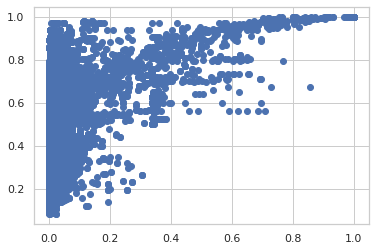

In [16]:

plt.scatter(df.dockQ,df.mm)


Text(0, 0.5, 'dockQ')

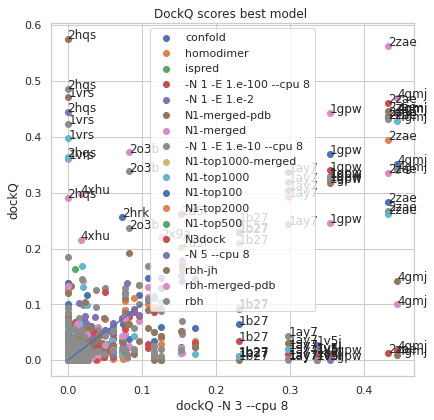

In [17]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in datasets:
    if d == datasets[0]: continue
    if d=="gramm":continue   
    if d[0:3]=="PDB":continue   
    if d[0:3]=="pdb":continue   
    if d[0:3]=="TMd":continue   
    if d=="trRosetta":continue   
    #if d=="confold":continue   
    #if d=="rbh-merged-pdb":continue   

    df_merged = pd.merge(data_max[datasets[0]],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4] # +d
        except:
            sstr=df_merged.name_y[i][0:4] #+d
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.1]
y=[0,0.1]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores best model ")
ax.set_xlabel("dockQ "+str(datasets[0]))
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'numcorrect')

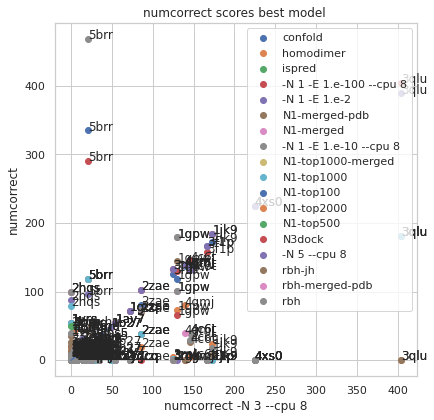

In [18]:
cutoff=5
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in datasets:
    if d == datasets[0]: continue
    if d=="gramm":continue   
    if d=="trRosetta":continue 
    if d[0:3]=="PDB":continue   
    if d[0:3]=="pdb":continue   
    if d[0:3]=="TMd":continue   
        
    #if d=="confold":continue   
    #if d=="rbh-merged-pdb":continue   

    df_merged = pd.merge(data_max[datasets[0]],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.numcorrect_x,df_merged.numcorrect_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.numcorrect_x[i]> cutoff or df_merged.numcorrect_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.numcorrect_x[i], df_merged.numcorrect_y[i]))
x=[0,50]
y=[0,50]
plt.plot(x,y)
ax.legend()
ax.set_title("numcorrect scores best model ")
ax.set_xlabel("numcorrect "+str(datasets[0]))
ax.set_ylabel("numcorrect")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ')

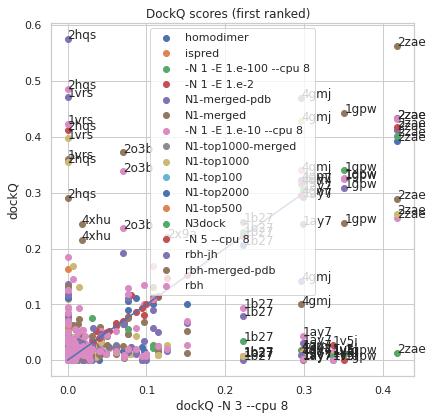

In [19]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in datasets:
    if d == datasets[0]: continue
    if d=="gramm":continue   
    if d=="trRosetta":continue   
    if d=="confold":continue   
    #if d=="rbh-merged-pdb":continue   
    if d[0:3]=="PDB":continue   
    if d[0:3]=="pdb":continue   
    if d[0:3]=="TMd":continue   
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_first[datasets[0]],data_first[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.3]
y=[0,0.3]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (first ranked)  ")
ax.set_xlabel("dockQ "+str(datasets[0]))
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ')

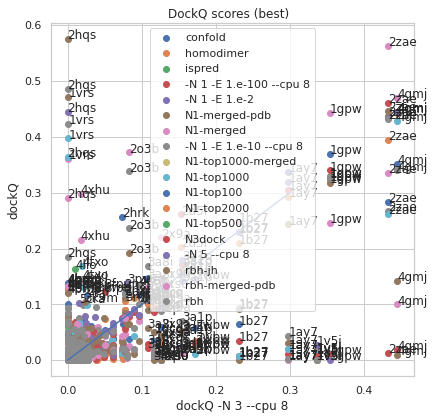

In [20]:
cutoff=0.1
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in datasets:
    if d == datasets[0]: continue
    if d=="gramm":continue   
    if d=="trRosetta":continue   
    if d=="rbh merge pdb ":continue   
    if d[0:3]=="PDB":continue   
    if d[0:3]=="pdb":continue   
    if d[0:3]=="TMd":continue   
        
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max[datasets[0]],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.3]
y=[0,0.3]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("dockQ "+str(datasets[0]))
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ')

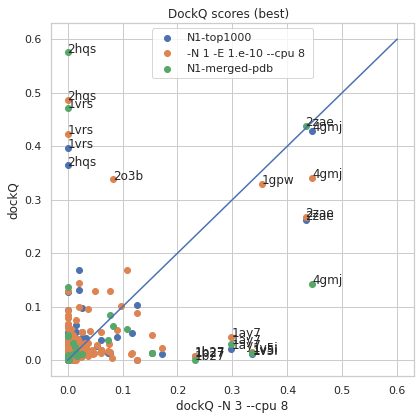

In [21]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["N1-top1000","-N 1 -E 1.e-10 --cpu 8 ","N1-merged-pdb"]:
    if d == datasets[0]: continue
    if d=="gramm":continue   
    if d=="trRosetta":continue   
    if d=="rbh merge pdb ":continue   
    if d[0:3]=="PDB":continue   
    if d[0:3]=="pdb":continue   
    if d[0:3]=="TMd":continue   
        
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max[datasets[0]],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.6]
y=[0,0.6]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("dockQ "+str(datasets[0]))
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

In [22]:
data_max.keys()

dict_keys(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred', '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb', 'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged', 'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock', '-N 5 --cpu 8', 'pdbcontacts-allintra', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK', 'pdbnewcontacts', 'PDBNEWDOCK-A', 'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2', 'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1', 'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax', 'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2', 'PDBNEWDOCK-A--dockD-relax', 'PDBNEWDOCK-A--starting', 'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B--dockB1', 'PDBNEWDOCK-B--dockB2', 'PDBNEWDOCK-B--dockB-relax', 'PDBNEWDOCK-B--starting', 'PDBNEWDOCK-B--step1', 'PDBNEWDOCK-B', 'PDBNEWDOCK-B--dockC1', 'PDBNEWDOCK-B--dockC2', 'PDBNEWDOCK-B--dockC-relax', 'PDBNEWDOCK-B--dockD1', 'PDBNEWDOCK-B--dockD2', 'PDBNEWDOCK-B--dockD-relax', 'PDBNEWDOCK-C', 'PDBNEWDOCK-C--

Text(0, 0.5, 'dockQ trRosetta')

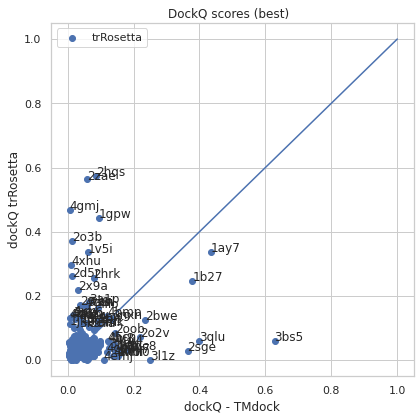

In [23]:
cutoff=0.1
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["trRosetta"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["TMdock-double"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,1.0]
y=[0,1.0]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("dockQ - TMdock")
ax.set_ylabel("dockQ "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ trRosetta')

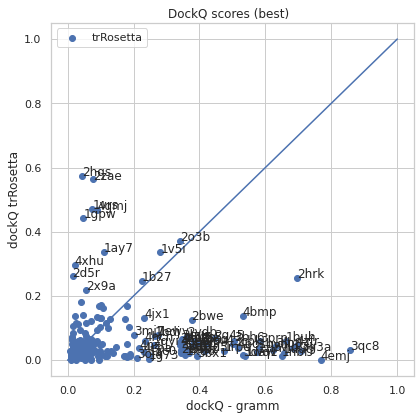

In [24]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["trRosetta"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["gramm"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,1.0]
y=[0,1.0]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("dockQ - gramm")
ax.set_ylabel("dockQ "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(20.200000000000003, 0.5, 'dockQ TMdock')

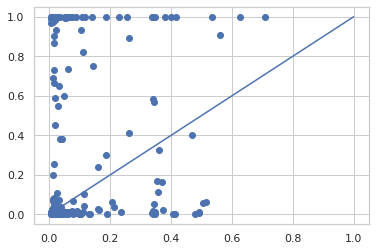

In [25]:
cutoff=0.1
#f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["TMdock"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_first["gramm"],data_first[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    #sns.jointplot(x="dockQ_x", y="dockQ_y", data=df_merged)
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,1.0]
y=[0,1.0]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (first model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ Gramm")
ax.set_ylabel("dockQ TMdock")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(20.200000000000003, 0.5, 'dockQ TMdock-nohomology')

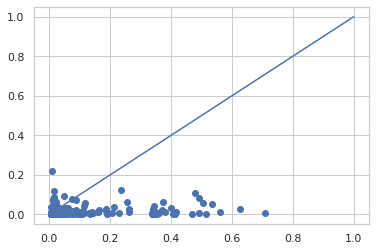

In [26]:
cutoff=0.1
#f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["TMdock-nohomology"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_first["gramm"],data_first[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    #sns.jointplot(x="dockQ_x", y="dockQ_y", data=df_merged)
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,1.0]
y=[0,1.0]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (first model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ Gramm")
ax.set_ylabel("dockQ TMdock-nohomology")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ TMdock')

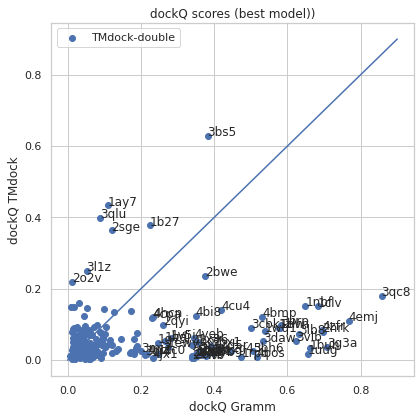

In [56]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["TMdock-double"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["gramm"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (best model))" )
ax.set_xlabel("dockQ Gramm")
ax.set_ylabel("dockQ TMdock")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ')

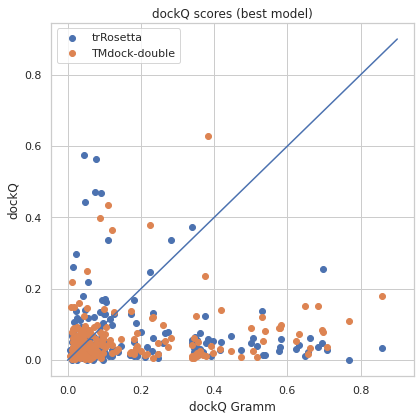

In [58]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["trRosetta","TMdock-double"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["gramm"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        #if (df_merged.dockQ_y[i]> cutoff and (df_merged.dockQ_y[i]>df_merged.dockQ_x[i])):
        #    ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (best model)") 
ax.set_xlabel("dockQ Gramm")
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ TMdock')

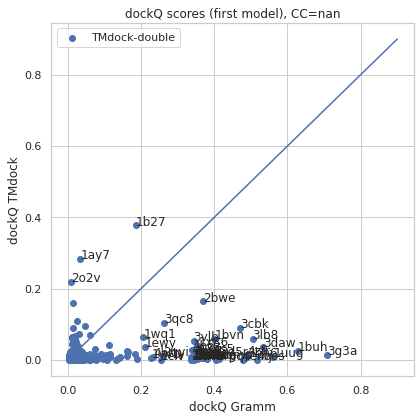

In [29]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["TMdock-double"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_first["gramm"],data_first[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (first model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ Gramm")
ax.set_ylabel("dockQ TMdock")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ TMdock TMdock-double')

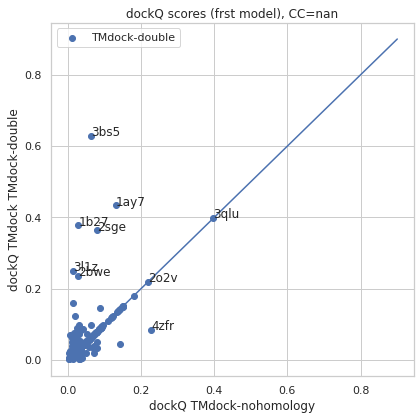

In [30]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["TMdock-double"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["TMdock-nohomology"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ TMdock-nohomology")
ax.set_ylabel("dockQ TMdock "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ TMdock trRosetta')

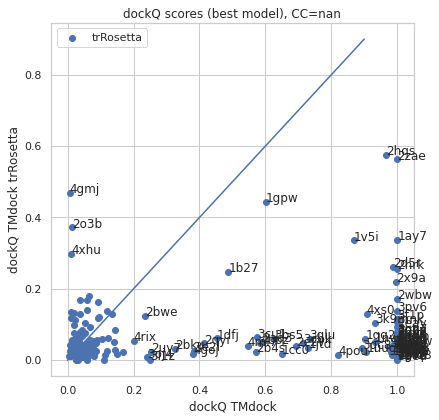

In [31]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["trRosetta"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["TMdock"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (best model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ TMdock")
ax.set_ylabel("dockQ TMdock "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  pdbsurface')

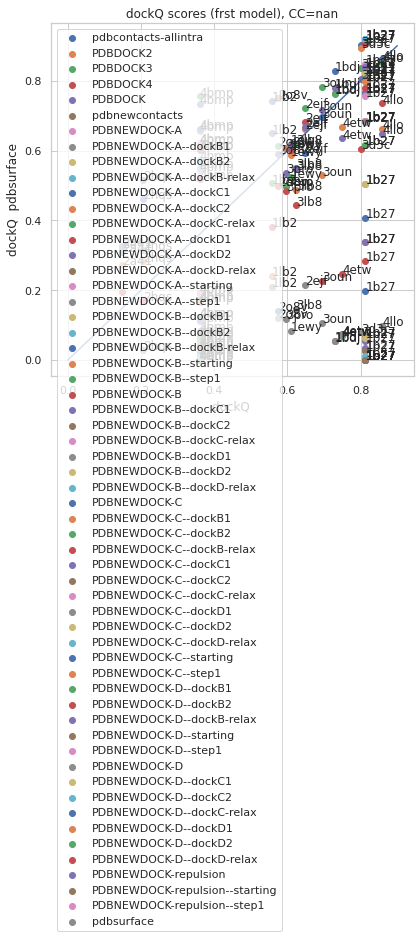

In [32]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile("^PDB|^pdb")
pdbset=list(filter(r.match, datasets))

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

In [33]:
cutoff=0.2
newdf=df_max.loc[df_max.dockQ>cutoff]
newdf=newdf.reset_index()


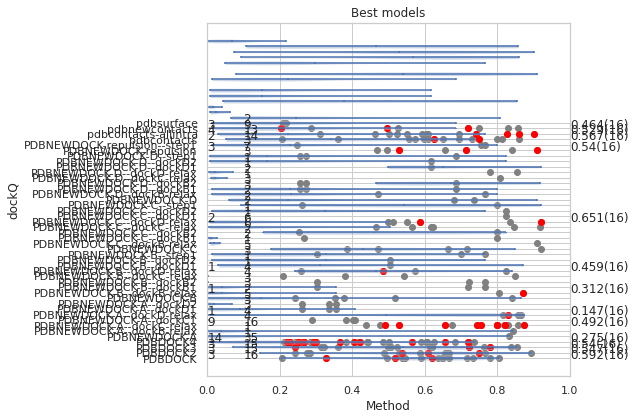

In [34]:
# FInd best method for each model.
codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
tempdf=newdf.loc[newdf.JHparams.isin(pdbset)]

#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()
best_df.sort_values("JHparams")

good_df=newdf.loc[(newdf.code.isin(codes))&(newdf.JHparams.isin(pdbset))].reset_index()
plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")
plt.scatter(best_df.dockQ,best_df.JHparams,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_ylabel("Method")
ax.set_xlabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
pos=[]
i=0
data=[]
for d in sorted(pdbset):
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
    pos+=[i]
    data+=[df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"]]
    i+=1
    #print (d)
    
    
ax.violinplot(data,pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    
for i, txt in enumerate(best_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[best_df.JHparams[i]]==0:
        done[best_df.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, best_df.JHparams[i]))
        ax.annotate(str(round(average[best_df.JHparams[i]],3))+"("+str(length[good_df.JHparams[i]])+")"
                    ,(1.0, best_df.JHparams[i]))
for d in datasets:
    done[d]=0
for i, txt in enumerate(good_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(good_df.loc[good_df.JHparams==good_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[good_df.JHparams[i]]==0:
        done[good_df.JHparams[i]]=1
        ax.annotate(str(numhit),(.1, good_df.JHparams[i]))
        #ax.annotate(str(round(average[good_df.JHparams[i]],3)),(1.0, good_df.JHparams[i]))
        #ax.annotate("("+str(length[good_df.JHparams[i]])+")",(1.2, good_df.JHparams[i]))


TMdock-double
gramm
trRosetta


IndexError: index out of bounds

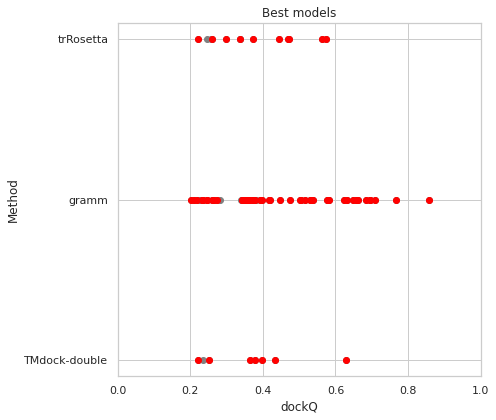

In [48]:
compareset=["trRosetta","gramm","TMdock-double"]
codes=df_max.loc[df_max.params.isin(compareset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
tempdf=newdf.loc[newdf.JHparams.isin(compareset)]

#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()
best_df.sort_values("JHparams")

good_df=newdf.loc[(newdf.code.isin(codes))&(newdf.JHparams.isin(compareset))].reset_index()
plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")
plt.scatter(best_df.dockQ,best_df.JHparams,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_ylabel("Method")
ax.set_xlabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
pos=[]
i=0
data=[]
for d in sorted(compareset):
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
    pos+=[i]
    data+=[df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"]]
    i+=1
    print (d)
    
    
ax.violinplot(data,pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    
for i, txt in enumerate(best_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[best_df.JHparams[i]]==0:
        done[best_df.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, best_df.JHparams[i]))
        ax.annotate(str(round(average[best_df.JHparams[i]],3))+"("+str(length[good_df.JHparams[i]])+")"
                    ,(1.0, best_df.JHparams[i]))
for d in datasets:
    done[d]=0
for i, txt in enumerate(good_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(good_df.loc[good_df.JHparams==good_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[good_df.JHparams[i]]==0:
        done[good_df.JHparams[i]]=1
        ax.annotate(str(numhit),(.1, good_df.JHparams[i]))
        #ax.annotate(str(round(average[good_df.JHparams[i]],3)),(1.0, good_df.JHparams[i]))
        #ax.annotate("("+str(length[good_df.JHparams[i]])+")",(1.2, good_df.JHparams[i]))


In [35]:
best_df

,index,JHparams,code,name,lenA,lenB,msa,msaA,msaB,dockQ,...,CODE,params,tmAB,msaAB,tmAB_max,msaAB_max,tmAB_min,msaAB_min,numcorrect,len
0,193,PDBNEWDOCK-C--dockD-relax,1b27,1b27_u1_A-1b27_u2_A.pdb-dockD-relax,109,90,733.0,0.,0.,0.919,...,1b27,PDBNEWDOCK-C--dockD-relax,0.995195,NaN,0.99602,0.,0.99437,0.,0.0,199
1,221,PDBNEWDOCK-repulsion,1gcq,1gcq_u1_A-1gcq_u2_A,66,57,1365.0,0.,0.,0.910,...,1gcq,PDBNEWDOCK-repulsion,0.994585,NaN,0.99571,0.,0.99346,0.,0.0,123
2,417,pdbcontacts-allintra,3d3c,3d3c_u2_A-3d3c_u1_A,140,140,6895.0,0.,0.,0.901,...,3d3c,pdbcontacts-allintra,0.993340,NaN,0.99663,0.,0.99018,0.,0.0,221
3,134,PDBNEWDOCK-A--dockC-relax,2wbw,2wbw_u1_A-2wbw_u2_A.pdb-dockC-relax,186,125,6.0,0.,0.,0.874,...,2wbw,PDBNEWDOCK-A--dockC-relax,0.990150,NaN,0.99051,0.,0.98979,0.,0.0,311
4,155,PDBNEWDOCK-B--dockB-relax,1ay7,1ay7_u1_A-1ay7_u2_A.pdb-dockB-relax,97,90,1060.0,0.,0.,0.872,...,1ay7,PDBNEWDOCK-B--dockB-relax,0.993120,NaN,0.99413,0.,0.99211,0.,0.0,187
5,422,pdbcontacts-allintra,4llo,4llo_u2_A-4llo_u1_A,147,147,6332.0,0.,0.,0.861,...,4llo,pdbcontacts-allintra,0.985985,NaN,0.99052,0.,0.98145,0.,0.0,262
6,143,PDBNEWDOCK-A--dockD-relax,2ido,2ido_u1_A-2ido_u2_A.pdb-dockD-relax,175,84,160.0,0.,0.,0.830,...,2ido,PDBNEWDOCK-A--dockD-relax,0.976935,NaN,0.98222,0.,0.97165,0.,0.0,259
7,410,pdbcontacts-allintra,1bdj,1bdj_u2_A-1bdj_u1_A,129,129,5651.0,0.,0.,0.827,...,1bdj,pdbcontacts-allintra,0.973870,NaN,0.98465,0.,0.96309,0.,0.0,247
8,130,PDBNEWDOCK-A--dockC-relax,2hrk,2hrk_u1_A-2hrk_u2_A.pdb-dockC-relax,181,121,3760.0,0.,0.,0.821,...,2hrk,PDBNEWDOCK-A--dockC-relax,0.955385,NaN,0.99477,0.,0.91600,0.,0.0,302
9,132,PDBNEWDOCK-A--dockC-relax,2nqd,2nqd_u1_A-2nqd_u2_A.pdb-dockC-relax,221,111,266.0,0.,0.,0.800,...,2nqd,PDBNEWDOCK-A--dockC-relax,0.975800,NaN,0.98273,0.,0.96887,0.,0.0,332


In [36]:
codes

array(['1bdj', '1ewy', '1jtd', '1lb2', '2a41', '2ejf', '2hqs', '2o8v',
       '3d3c', '3lb8', '3oun', '3pro', '4bmp', '4etw', '4llo', '5brr',
       '1ay7', '1b27', '1bvn', '1gcq', '1gpw', '1he1', '1i4e', '1i8l',
       '1jiw', '1k5g', '1nql', '1vg0', '2aq3', '2b4s', '2d5r', '2grx',
       '2hj9', '2hrk', '2ido', '2nqd', '2nxn', '2o3b', '2sge', '2wbw',
       '2x9a', '2xwb', '2zae', '3a1p', '3a8i', '3bs5', '3buz', '3cw2',
       '3fpu', '3lwn', '3ona', '3rnk', '3vlb', '3w31', '3wkt', '4bi8',
       '4gmj', '4hcn', '4k0v', '4kyi', '4o4b', '4rf0', '4xhu', '4yoc',
       '5eg3'], dtype=object)

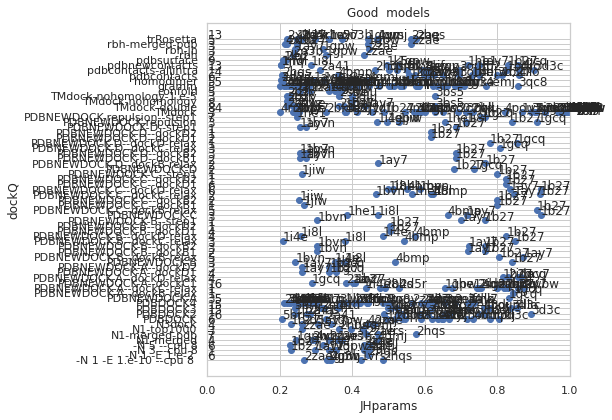

In [37]:

f, ax = plt.subplots(figsize=(6.5, 6.5))
plt.scatter(newdf.dockQ,newdf.JHparams)
#cc=np.corrcoef(newdf.dockQ,newdf.len)
ax.set_title("Good  models")
ax.set_xlabel("JHparams")
ax.set_ylabel("dockQ")
ax.set(xlim=[0,1])
done={}
for d in datasets:
    done[d]=0
for i, txt in enumerate(newdf.name):
    #print (i,txt)
    sstr=txt[0:4]
    ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(newdf.loc[newdf.JHparams==newdf.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[newdf.JHparams[i]]==0:
        done[newdf.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, newdf.JHparams[i]))

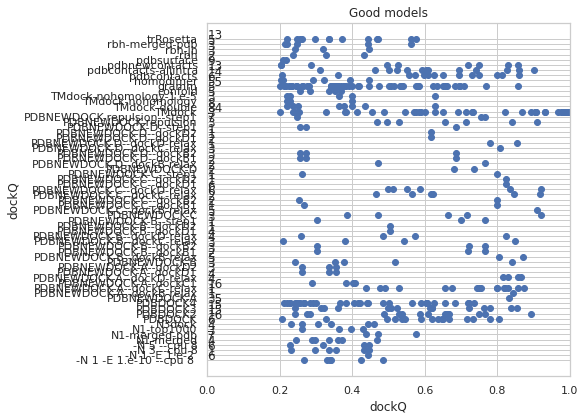

In [38]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
plt.scatter(newdf.dockQ,newdf.JHparams)
#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Good models")
ax.set_xlabel("dockQ")
ax.set_ylabel("dockQ")
ax.set(xlim=[0,1])
done={}
for d in datasets:
    done[d]=0
for i, txt in enumerate(newdf.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(newdf.loc[newdf.JHparams==newdf.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[newdf.JHparams[i]]==0:
        done[newdf.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, newdf.JHparams[i]))

In [39]:
datasets

array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       '-N 5 --cpu 8', 'pdbcontacts-allintra', 'pdbcontacts', 'PDBDOCK2',
       'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK', 'pdbnewcontacts',
       'PDBNEWDOCK-A', 'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2',
       'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1',
       'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax',
       'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2',
       'PDBNEWDOCK-A--dockD-relax', 'PDBNEWDOCK-A--starting',
       'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B--dockB1',
       'PDBNEWDOCK-B--dockB2', 'PDBNEWDOCK-B--dockB-relax',
       'PDBNEWDOCK-B--starting', 'PDBNEWDOCK-B--step1', 'PDBNEWDOCK-B',
       'PDBNEWDOCK-B--dockC1', 'PDBNEWDOCK-B--dockC2',
       'PDBNEWDOCK-B--dockC-relax', 'PDBNEW

In [40]:
# here we find what method is best for each target

r = re.compile("^PDB.*|^TMd.*|^gramm|trRosetta|^pdb.*")
excludecolumns = list(filter(r.match, datasets)) # Read Note
print(excludecolumns)
excludecolumns+=["confold","rbh-merged-pdb"]
tempdf=newdf.loc[~newdf.JHparams.isin(excludecolumns)]

#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()
best_df.sort_values("JHparams")

['gramm', 'pdbcontacts-allintra', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK', 'pdbnewcontacts', 'PDBNEWDOCK-A', 'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2', 'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1', 'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax', 'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2', 'PDBNEWDOCK-A--dockD-relax', 'PDBNEWDOCK-A--starting', 'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B--dockB1', 'PDBNEWDOCK-B--dockB2', 'PDBNEWDOCK-B--dockB-relax', 'PDBNEWDOCK-B--starting', 'PDBNEWDOCK-B--step1', 'PDBNEWDOCK-B', 'PDBNEWDOCK-B--dockC1', 'PDBNEWDOCK-B--dockC2', 'PDBNEWDOCK-B--dockC-relax', 'PDBNEWDOCK-B--dockD1', 'PDBNEWDOCK-B--dockD2', 'PDBNEWDOCK-B--dockD-relax', 'PDBNEWDOCK-C', 'PDBNEWDOCK-C--dockB1', 'PDBNEWDOCK-C--dockB2', 'PDBNEWDOCK-C--dockB-relax', 'PDBNEWDOCK-C--dockC1', 'PDBNEWDOCK-C--dockC2', 'PDBNEWDOCK-C--dockC-relax', 'PDBNEWDOCK-C--dockD1', 'PDBNEWDOCK-C--dockD2', 'PDBNEWDOCK-C--dockD-relax', 'PDBNEWDOCK-C--starting', 'PDBNEWDOCK-C--step1'

,index,JHparams,code,name,lenA,lenB,msa,msaA,msaB,dockQ,...,CODE,params,tmAB,msaAB,tmAB_max,msaAB_max,tmAB_min,msaAB_min,numcorrect,len
5,9,-N 3 --cpu 8,1gpw,1gpw_u2_A-1gpw_u1_A,252,252,7137.0,67629,67629,0.354,...,1gpw,-N 3 --cpu 8,0.888935,NaN,0.89468,67629,0.88319,58466,130.000,456
6,10,-N 3 --cpu 8,1v5i,1v5i_u2_A-1v5i_u1_A,276,276,1922.0,54177,54177,0.336,...,1v5i,-N 3 --cpu 8,0.826270,NaN,0.89294,54177,0.75960,12066,1.000,354
10,8,-N 3 --cpu 8,1b27,1b27_u2_A-1b27_u1_A,109,109,733.0,2034,2034,0.231,...,1b27,-N 3 --cpu 8,0.824750,NaN,0.85428,2034,0.79522,1484,49.025,199
7,13,-N 5 --cpu 8,1ay7,1ay7_u2_A-1ay7_u1_A,97,97,1060.0,2034,2034,0.319,...,1ay7,-N 5 --cpu 8,0.830380,NaN,0.84095,2034,0.81981,1485,53.985,187
2,22,N1-merged,4gmj,4gmj_u2_A-4gmj_u1_A,253,253,1189.0,0.,0.,0.469,...,4gmj,N1-merged,0.803190,NaN,0.82588,0.,0.78050,0.,137.151,489
4,20,N1-merged,2o3b,2o3b_u2_A-2o3b_u1_A,240,240,456.0,0.,0.,0.372,...,2o3b,N1-merged,0.727490,NaN,0.83406,0.,0.62495,0.,29.008,384
8,23,N1-merged,4xhu,4xhu_u2_A-4xhu_u1_A,352,352,410.0,0.,0.,0.298,...,4xhu,N1-merged,0.829155,NaN,0.84232,0.,0.81599,0.,19.910,447
0,25,N1-merged-pdb,2hqs,2hqs_u2_A-2hqs_u1_A,398,398,2368.0,0.,0.,0.575,...,2hqs,N1-merged-pdb,0.969605,NaN,0.97016,0.,0.96905,0.,100.035,507
1,24,N1-merged-pdb,1vrs,1vrs_u2_A-1vrs_u1_A,124,124,836.0,0.,0.,0.472,...,1vrs,N1-merged-pdb,0.989810,NaN,0.99288,0.,0.98674,0.,53.988,241
3,35,N3dock,2zae,2zae_u2_A-2zae_u1_A,107,107,1125.0,1659,1659,0.461,...,2zae,N3dock,0.792020,NaN,0.79343,1659,0.79061,1521,103.041,200


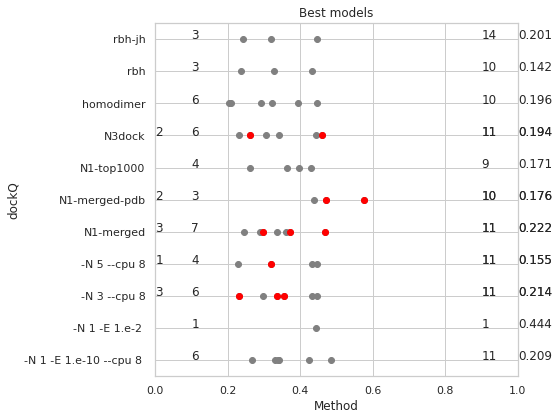

In [41]:
# FInd best method for each model.
codes=best_df["code"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
good_df=newdf.loc[(newdf.code.isin(codes))&(~newdf.JHparams.isin(excludecolumns))].reset_index()
plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")
plt.scatter(best_df.dockQ,best_df.JHparams,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_xlabel("Method")
ax.set_ylabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
for d in datasets:
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
for i, txt in enumerate(best_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[best_df.JHparams[i]]==0:
        done[best_df.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, best_df.JHparams[i]))
        ax.annotate(str(round(average[best_df.JHparams[i]],3)),(1.0, best_df.JHparams[i]))
        ax.annotate(str(length[best_df.JHparams[i]]),(.9, best_df.JHparams[i]))
for d in datasets:
    done[d]=0
for i, txt in enumerate(good_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(good_df.loc[good_df.JHparams==good_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[good_df.JHparams[i]]==0:
        done[good_df.JHparams[i]]=1
        ax.annotate(str(numhit),(.1, good_df.JHparams[i]))
        ax.annotate(str(round(average[good_df.JHparams[i]],3)),(1.0, good_df.JHparams[i]))
        ax.annotate(str(length[good_df.JHparams[i]]),(.9, good_df.JHparams[i]))


In [42]:
df.sort_values('dockQ', ascending=False).drop_duplicates(["code"])

,name,JHparams,lenA,lenB,msa,msaA,msaB,dockQ,fnat,iRMS,...,CODE,params,tmAB,msaAB,tmAB_max,msaAB_max,tmAB_min,msaAB_min,numcorrect,len
13404,1nbf_u1_A-1nbf_u2_A,TMdock,340,78,0.0,0.,0.,1.000,1.0,0.000,...,1nbf,TMdock,1.000000,NaN,1.00000,0.,1.00000,0.,0.000,418
14204,3d5r_u1_A-3d5r_u2_A,TMdock,295,62,0.0,0.,0.,1.000,1.0,0.000,...,3d5r,TMdock,1.000000,NaN,1.00000,0.,1.00000,0.,0.000,357
14374,3mj7_u1_A-3mj7_u2_A,TMdock,228,187,0.0,0.,0.,1.000,1.0,0.000,...,3mj7,TMdock,1.000000,NaN,1.00000,0.,1.00000,0.,23.085,415
13854,2hrk_u1_A-2hrk_u2_A,TMdock,181,121,0.0,0.,0.,1.000,1.0,0.011,...,2hrk,TMdock,1.000000,NaN,1.00000,0.,1.00000,0.,0.000,302
13604,1ycs_u1_A-1ycs_u2_A,TMdock,197,195,0.0,0.,0.,1.000,1.0,0.000,...,1ycs,TMdock,1.000000,NaN,1.00000,0.,1.00000,0.,0.000,392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2841,4rws_u1_A-4rws_u2_A,gramm,434,72,0.0,0.,0.,0.021,0.0,13.383,...,4rws,gramm,1.000000,NaN,1.00000,0.,1.00000,0.,0.000,506
2878,4v2c_u1_A-4v2c_u2_A,gramm,324,107,0.0,0.,0.,0.019,0.0,14.698,...,4v2c,gramm,1.000000,NaN,1.00000,0.,1.00000,0.,0.000,431
6973,1te1_u1_A-1te1_u2_A,TMdock-nohomology-1.e-5,275,191,0.0,0.,0.,0.016,0.0,16.409,...,1te1,TMdock-nohomology-1.e-5,1.000000,NaN,1.00000,0.,1.00000,0.,0.000,466
16201,2o25_u2_A-2o25_u1_A,trRosetta,160,202,1373.0,37698,37736,0.016,0.0,21.217,...,2o25,homodimer,0.703365,NaN,0.72206,37736,0.68467,37698,0.000,362


In [43]:
df.loc[(df.dockQ>cutoff) & (~df.JHparams.isin(excludecolumns))].groupby("name").max()


,JHparams,lenA,lenB,msa,msaA,msaB,dockQ,fnat,iRMS,LRMS,...,CODE,params,tmAB,msaAB,tmAB_max,msaAB_max,tmAB_min,msaAB_min,numcorrect,len
name,,,,,,,,,,,,,,,,,,,,,
1ay7_u1_A-1ay7_u2_A,rbh-jh,97,90,1060.0,1485,2034,0.319,0.306,4.002,9.104,...,1ay7,rbh-jh,0.830380,NaN,0.84625,2034,0.81981,1485,53.985,187
1ay7_u2_A-1ay7_u1_A,homodimer,90,97,1060.0,2034,1485,0.260,0.306,4.395,11.298,...,1ay7,homodimer,0.817620,NaN,0.84181,2034,0.79459,1485,43.992,187
1b27_u1_A-1b27_u2_A,homodimer,109,90,733.0,1484,2034,0.230,0.160,4.787,10.176,...,1b27,homodimer,0.825820,NaN,0.85658,2034,0.79542,1484,49.025,199
1b27_u2_A-1b27_u1_A,homodimer,90,109,733.0,2034,1484,0.231,0.160,5.319,9.542,...,1b27,homodimer,0.810645,NaN,0.83444,2034,0.78801,1484,46.020,199
1gpw_u1_A-1gpw_u2_A,rbh-jh,252,204,7137.0,58466,7554,0.351,0.320,4.776,11.778,...,1gpw,rbh-jh,0.889680,NaN,0.89229,7554,0.88822,58466,179.000,456
1gpw_u2_A-1gpw_u1_A,rbh-jh,204,252,7137.0,7554,58466,0.354,0.333,5.865,9.606,...,1gpw,rbh-jh,0.894335,NaN,0.89745,7554,0.89220,58466,163.000,456
1v5i_u1_A-1v5i_u2_A,-N 3 --cpu 8,276,78,1922.0,54177,12066,0.336,0.191,3.748,5.851,...,1v5i,-N 3 --cpu 8,0.818890,NaN,0.88557,54177,0.75221,12066,1.000,354
1vrs_u1_A-1vrs_u2_A,N1-top1000,124,117,836.0,1396,1245,0.472,0.449,2.953,9.785,...,1vrs,N1-top1000,0.989810,NaN,0.99288,1396,0.98674,1245,53.988,241
1vrs_u2_A-1vrs_u1_A,N1-top1000,117,124,2091.0,1245,1396,0.295,0.286,7.831,11.866,...,1vrs,N1-top1000,0.897465,NaN,0.98730,1396,0.81427,1245,40.015,241


KeyError: 0

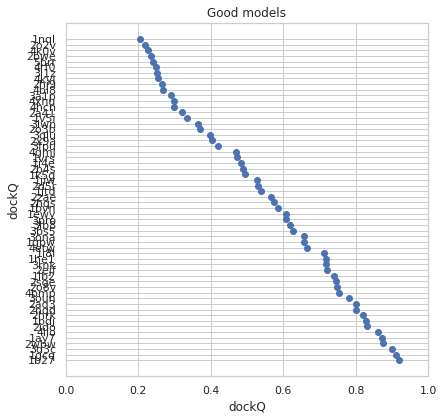

In [44]:
excludecolumns=["gramm","pdbcontacts","PDBDOCK","TMdock","trRosetta","TMdock-nohomology","TMdock-nohomology-1.e-5"]
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best methods")

#new_df=df.loc[(df.dockQ>cutoff) & (~df.JHparams.isin(excludecolumns))].groupby("code").max().reset_index()
new_df=df.loc[(df.dockQ>cutoff) & (~df.JHparams.isin(excludecolumns))].sort_values('dockQ', ascending=False).drop_duplicates(["code"])

#print(newdf)
#newdf.sort_values(["JHparams","dockQ","code"],inplace=True)
plt.scatter(new_df.dockQ,new_df.code)
#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Good models")
ax.set_xlabel("dockQ")
ax.set_ylabel("dockQ")
ax.set(xlim=[0,1])
done={}
for d in datasets:
    done[d]=0
for i, txt in enumerate(new_df.JHparams):
    #print (i,txt,newdf.dockQ[i], newdf.code[i])
    sstr=txt
    ax.annotate(sstr, (new_df.dockQ[i], new_df.code[i]))


In [ ]:
excludecolumns=["rbh-merged-pdb","gramm","pdbcontacts","pdbcontacts-1.e-5","PDBDOCK","PDBDOCK2","PDBDOCK3","TMdock","trRosetta","TMdock-nohomology","TMdock-double","TMdock-nohomology-1.e-5"]
includeTR=["pdbcontacts","PDBDOCK","TMdock-double"]
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best methods")

new_df=df.loc[(df.dockQ>cutoff) & (~df.JHparams.isin(excludecolumns))].sort_values('dockQ', ascending=False).drop_duplicates(["code"]).reset_index()
codes=new_df.CODE.unique()
#print(new_df)
#newdf.sort_values(["JHparams","dockQ","code"],inplace=True)

tempdf=df_max.loc[(df_max.CODE.isin(codes)) & (~df_max.params.isin(includeTR))].reset_index()
plt.scatter(tempdf.dockQ,tempdf.params,color="grey")
#print(tempdf[tempdf.params=="N1-top1000"])
plt.scatter(new_df.dockQ,new_df.params,color="red")
#print(new_df[new_df.params=="N1-top1000"])

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Average scores for good models")
ax.set_xlabel("dockQ")
ax.set_ylabel("Method")
ax.set(xlim=[0,1])
done={}
average={}
length={}
ax.set(xlim=[0,1.5])
for d in datasets: #~df.JHparams.isin(excludecolumns).unique():
    done[d]=0
    average[d]=df_max.loc[(df_max.CODE.isin(codes)) & (df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[(df_max.CODE.isin(codes)) & (df_max.params==d)]["dockQ"])
for i, txt in enumerate(tempdf.name):
    #print (i,txt, newdf.JHparams[i])
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(tempdf.loc[(tempdf.params==tempdf.params[i])&(tempdf.dockQ>cutoff)])
    
    #print (numhit,newdf.JHparams[i])
    if done[tempdf.params[i]]==0:
        done[tempdf.params[i]]=1
        ax.annotate(str(numhit),(1.1, tempdf.params[i]))
        #ax.annotate("0",(.1, tempdf.JHparams[i]))  
        ax.annotate(str(round(average[tempdf.params[i]],3)),(.9, tempdf.params[i]))          
        ax.annotate(str(round(length[tempdf.params[i]],3)),(.75, tempdf.params[i]))  
for d in datasets: #~df.JHparams.isin(excludecolumns).unique():
    done[d]=0
for i, txt in enumerate(new_df.name):
    #print (i,txt,newdf.dockQ[i], newdf.JHparams[i])
    sstr=txt[0:4]
    ax.annotate(sstr, (new_df.dockQ[i], new_df.params[i]))
    numhit=len(new_df.loc[new_df.params==new_df.params[i]])
    #numhit2=len(tempdf.loc[tempdf.JHparams==tempdf.params[i]])
    #print (numhit,newdf.JHparams[i])
    if done[new_df.params[i]]==0:
        done[new_df.params[i]]=1
        ax.annotate(str(numhit),(1.3, new_df.params[i]))  
        #ax.annotate(str(numhit2),(-0.1, new_df.JHparams[i]))


In [ ]:
df["size"]=pd.qcut(df['msa'], q=4)
df["l"]=pd.qcut(df['lenA'], q=1)

f, ax = plt.subplots(figsize=(6.5, 6.5))
ax = sns.violinplot(x="l", y="dockQ", hue="JHparams",
                    data=df, palette="muted")

In [ ]:
new_df

In [ ]:
newdf

In [ ]:
df_first["size"]=pd.qcut(df_first['msa'], q=4)
df_first["l"]=pd.qcut(df_first['lenA'], q=1)

f, ax = plt.subplots(figsize=(6.5, 6.5))
ax = sns.violinplot(x="l", y="dockQ", hue="JHparams",
                    data=df_first, palette="muted")

In [ ]:
df["size"]=pd.qcut(df['msa'], q=4)
df["l"]=pd.qcut(df['lenA'], q=1)

f, ax = plt.subplots(figsize=(6.5, 6.5))
ax = sns.violinplot(x="l", y="iRMS", hue="JHparams",
                    data=df_first, palette="muted")

In [ ]:
data_first[datasets[0]]

# TEST to do
# First ranked..
# U1 vs U2

In [ ]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in datasets:
    df_merged = pd.merge(data_max[d],data_first[d], on=['code'],how="inner")
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d+" "+str(round(cc[0,1],3)))
ax.set_title("first vs best model")
ax.set_xlabel("Best model")
ax.set_ylabel("First model")
ax.legend()



In [ ]:
datasets


In [ ]:
tempdf=data_max['-N 1 -E 1.e-10 --cpu 8 '] 

for y in ["numcorrect","msaAB","msa","tmAB","msa"]:
    for x in ["dockQ","tmAB","tmAB_min","mm",]:
        #print (Name)
         #if (Name != "lenA"):
        #    continue
        xdata=tempdf[x]
        ydata=tempdf[y]
        f, ax = plt.subplots(figsize=(6.5, 6.5))
        plt.scatter(xdata,ydata)
        cc=np.corrcoef(xdata,ydata)
        ax.set_title(x + " - " + y + " " + str(round(cc[0,1],3)))
        ax.set_xlabel(x)
        ax.set_ylabel(y)
        for i, txt in enumerate(tempdf.name):
            sstr=txt[0:4]
            if (xdata[i]>cutoff or ydata[i]>25):
                ax.annotate(sstr, (xdata[i], ydata[i]))
    plt.close()

In [ ]:
print (codes)


In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()


In [ ]:
ydata=df.dockQ

In [ ]:
xdata=df[["lenA","lenB","msa","long","med","longA","medA","longB","medB"]]


In [ ]:
reg.fit(xdata,ydata)

In [ ]:

print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_)


In [ ]:
ypred = reg.predict(xdata)
f, ax = plt.subplots(figsize=(6.5, 6.5))
plt.scatter(ydata,ypred)
cc=np.corrcoef(ydata,ypred)
ax.set_title("CC" + " " + str(cc[0,1]))
ax.set_xlabel("dockQ")
ax.set_ylabel("predicted dockQ")
